In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [7]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
train_data.shape


(404, 13)

In [8]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std
#normalization

In [10]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])
    return model
#Dataset is small so i want to small neural network because i don't want overfitting.    
#adam,mse or mae are Hyperparameter optimization

In [16]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print(f'Processing fold # {i}')
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
                            [train_data[:i * num_val_samples],
                            train_data[(i+1) * num_val_samples:]],
                            axis=0)
    partial_train_targets = np.concatenate(
                            [train_targets[:i * num_val_samples],
                            train_targets[(i+1)*num_val_samples:]],
                            axis=0)
    model = build_model()
    model.fit(partial_train_data,
              partial_train_targets,
              epochs=num_epochs,
              batch_size=1,
              verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [17]:
print(f'all_scores : {all_scores}')
print(f'mean all scores : {np.mean(all_scores)}')

all_scores : [2.4084901809692383, 2.358886480331421, 2.3323893547058105, 2.351155996322632]
mean all scores : 2.3627305030822754


In [27]:
model = build_model()
history = model.fit(train_data, train_targets, epochs=100, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 19.8100 - mae: 2.7418


13/13 [==============================] - 0s 2ms/step


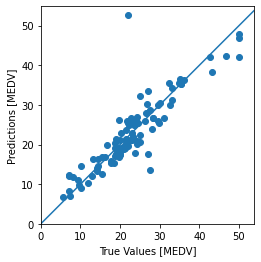

In [34]:
test_predictions = model.predict(test_data).flatten()
train_predictions = model.predict(train_data).flatten()

plt.scatter(test_targets, test_predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])